## Part 1: Business Intelligence

There are studies showing that museums can yield positive influence on high school education. By engaging students in arts or history museum learning espericen, school can actually prevent the drop-out rate and improve the chance for students to graduate on time. Therefore, in this challenge, I want to know whether there is a postive relationship between the school's graduation rate and the number of museums in the area. Even if there exists relationship, I want to find out whether the impact is significant or not.

## Part 2: Hypothesis

Education & public space: graduation rate and number of museums
 - $H_0$: The number of museums and graduation rate has no significant relationship.
 - $H_1$: The number of museums and graduation rate has significant relationship. The more museums are in the area, the higher the graduation rate.

## Part 3: Data Understanding

In [1]:
# import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the datasets from NYC Open Data
school = pd.read_csv('2018_DOE_High_School_Directory.csv')
museum = pd.read_csv('MUSEUM.csv')

Before conducting any analysis, I first look at the summary of these two datasets.

In [3]:
school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Columns: 462 entries, dbn to NTA
dtypes: float64(153), int64(2), object(307)
memory usage: 1.5+ MB


In [4]:
museum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 8 columns):
the_geom    130 non-null object
NAME        130 non-null object
TEL         128 non-null object
URL         130 non-null object
ADRESS1     130 non-null object
ADDRESS2    15 non-null object
CITY        130 non-null object
ZIP         130 non-null int64
dtypes: int64(1), object(7)
memory usage: 8.2+ KB


In [5]:
school.head()

,dbn,school_name,boro,overview_paragraph,school_10th_seats,academicopportunities1,academicopportunities2,academicopportunities3,academicopportunities4,academicopportunities5,...,state_code,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,08X519,Felisa Rincon de Gautier Institute for Law and...,X,The Felisa Rincon de Gautier Institute for Law...,Y,CTE program(s) in: Law Academy,"Introduction to Law and Public Policy, Civil L...","Forensic Science, Crime Scene Investigation, S...","Journalism, Partnership with Monroe College, C...",Partnerships with The Justice Resource Center ...,...,NY,BRONX,40.820486,-73.881187,9.0,17.0,28.0,2022544.0,2.036220e+09,Soundview-Castle Hill-Clason Point-Harding Par...
1,13K350,Urban Assembly High School of Music and Art,K,The Urban Assembly School of Music and Art pre...,Y,The Arts program offerings are the vehicles th...,Art /Academic Portfolios for assessments are p...,Student Participate in theme-based trips & The...,"Pro Tools, Logic, Garage Band, Photoshop, Illu...","Artist-in-Residence, Visiting Artist Series, T...",...,NY,BROOKLYN,40.69733,-73.984528,2.0,33.0,15.0,3000216.0,3.001200e+09,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hi...
2,28Q680,Queens Gateway to Health Sciences Secondary Sc...,Q,is committed to discipline and hard work. We ...,Y,"Community Service, PSAT/SAT Prep (grades 9-11 ...","CUNY College Now, Hospital Internships and Vol...","Separate medical mentoring for boys and girls,...",Double-period science and mathematics classes,NaN,...,NY,QUEENS,40.718027,-73.805923,8.0,24.0,1267.0,4539721.0,4.068580e+09,Pomonok-Flushing Heights-Hillcrest ...
3,08X282,Women's Academy of Excellence,X,The Women's Academy of Excellence is an all-gi...,NaN,"Genetic Research Seminar, L'Oreal Roll Model P...","Monroe College JumpStart, National Hispanic Ho...","Pupilpath, Saturday School, Leadership Class, ...","PEARLS Awards, Academy Awards, Rose Ceremony/P...",School uniform required that includes skirt an...,...,NY,BRONX,40.81504,-73.85607,9.0,18.0,4.0,2020580.0,2.034780e+09,Soundview-Castle Hill-Clason Point-Harding Par...
4,25Q285,World Journalism Preparatory: A College Board ...,Q,"At World Journalism Preparatory School (WJPS),...",NaN,"iLearnNYC, a program for expanded online cours...","Four years of English, Math, Science, and Soci...",Advisory program supports social and emotional...,Pupil Path and Naviance online systems help st...,NaN,...,NY,QUEENS,40.764884,-73.789365,11.0,19.0,1139.0,4119139.0,4.052610e+09,Auburndale ...


In [6]:
museum.head()

,the_geom,NAME,TEL,URL,ADRESS1,ADDRESS2,CITY,ZIP
0,POINT (-74.01375579519738 40.703816216918035),Alexander Hamilton U.S. Custom House,(212) 514-3700,http://www.oldnycustomhouse.gov/,1 Bowling Grn,NaN,New York,10004
1,POINT (-74.06303178855111 40.615120837755356),Alice Austen House Museum,(718) 816-4506,http://www.aliceausten.org/,2 Hylan Blvd,NaN,Staten Island,10305
2,POINT (-73.94729768541572 40.833853500753314),American Academy of Arts and Letters,(212) 368-5900,http://www.artsandletters.org/,633 W. 155th St.,NaN,New York,10032
3,POINT (-73.97810302110001 40.76162497138548),American Folk Art Museum,(212) 265-1040,http://www.folkartmuseum.org/,45 West 53rd Street,NaN,New York,10019
4,POINT (-74.0396848374904 40.69905626244391),American Immigration History Center,(212) 363-3200,http://www.ellisisland.org/,Ellis Island,NaN,New York,0


In [7]:
# Keeping the features that matter and excluding unnecessary ones
school = school[['school_name','neighborhood','shared_space','total_students','pct_stu_enough_variety',\
                 'graduation_rate', 'attendance_rate', 'pct_stu_safe','Postcode', 'Borough']]
museum = museum[['NAME', 'CITY', 'ZIP']]

## Part 4: Data Preparation

In [8]:
# Count the number of museums by postal code
m1 = museum.groupby('ZIP').count()['NAME'].reset_index()
m1.columns = ['Postcode', 'Museum_count']

<b>Data Joining

In [9]:
# Join the school table with the museum table on Postcode using left join
df = school.merge(m1, on = ['Postcode'], how = 'left')

In [10]:
df.head(3)

,school_name,neighborhood,shared_space,total_students,pct_stu_enough_variety,graduation_rate,attendance_rate,pct_stu_safe,Postcode,Borough,Museum_count
0,Felisa Rincon de Gautier Institute for Law and...,Castle Hill-Clason Point,Yes,242,0.15,0.49,0.81,0.38,10473,BRONX,NaN
1,Urban Assembly High School of Music and Art,DUMBO-Downtown Brooklyn,Yes,268,0.17,0.83,0.81,0.91,11201,BROOKLYN,1.0
2,Queens Gateway to Health Sciences Secondary Sc...,Flushing Heights-Hillcrest,Yes,704,0.24,0.97,0.96,0.85,11432,QUEENS,1.0


In [11]:
set(df['Borough'])

{'BRONX    ', nan, 'QUEENS   ', 'BROOKLYN ', 'STATEN IS', 'MANHATTAN'}

<b>Handling Missing Values

In [12]:
df_missing = df.isnull().sum()[df.isnull().sum() != 0]/len(df)*100

In [13]:
df_missing.sort_values(ascending= False)

Museum_count              56.321839
graduation_rate           10.344828
Borough                    0.229885
pct_stu_safe               0.229885
attendance_rate            0.229885
pct_stu_enough_variety     0.229885
dtype: float64

From the above analysis, one can see that "Museum_count" has over 56% of missing value and our target variable "graduation_rate" also has some missing values. In addition, the percentage of the rest features that have missing values are the same, which indicates the missingness is not missing at random.

- 'graduation_rate'<br>
Since our response variable is "graduation_rate", I will drop the instances whose "graduation_rate" is missing.

In [14]:
df.dropna(subset= ['graduation_rate'], inplace=True)

In [15]:
df.isnull().sum()[df.isnull().sum() != 0]/len(df)*100

Borough          0.256410
Museum_count    56.923077
dtype: float64

After dropping the instances with missing "graduation_rate", only "Borough" and "Museum_count" contain missing value.

- 'Museum_count'<br>
In this scenario, I assume the museum dataset is comprehensive of the museums in New York City. Therefore, the missing value for "Museum_count" is treated as 0, implying that there is no museum in the zip code area.

In [16]:
df['Museum_count'].fillna(0, inplace = True)

- 'Borough'<br>

Since there is only 1 instance with "Borough" as missing value, I manually googled the school and found out that the school is located in the Queens area. Therefore, I filled in the value as "QUEENS" for the row.

In [17]:
df['Borough'][df['Borough'].isnull()] = 'QUEENS'

<b> Data Type Conversion - 'Postcode'

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 434
Data columns (total 11 columns):
school_name               390 non-null object
neighborhood              390 non-null object
shared_space              390 non-null object
total_students            390 non-null int64
pct_stu_enough_variety    390 non-null float64
graduation_rate           390 non-null float64
attendance_rate           390 non-null float64
pct_stu_safe              390 non-null float64
Postcode                  390 non-null int64
Borough                   390 non-null object
Museum_count              390 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 36.6+ KB


In [19]:
# Covert the "Postcode" from int64 to object
df['Postcode'] = df['Postcode'].astype('object')

<b>Strip extra spaces - 'Borough'

In [20]:
df['Borough']= df['Borough'].str.strip()

## Part 5: Exploratory Data Analysis

Provide 2 statistical analyses and 1 or more visualizations to pair with the analyses.

In [21]:
# seperate the numerical features and categorical features
numeric_col = list(df.select_dtypes(include=['float64', 'int64']).columns)
cat_col = list(df.select_dtypes(include=['object']).columns)
cat_col.remove('school_name')

- Correlation Analysis<br>
Analyze the correlation of numerical features with heatmap visualization.

In [22]:
corr = df[numeric_col].corr()

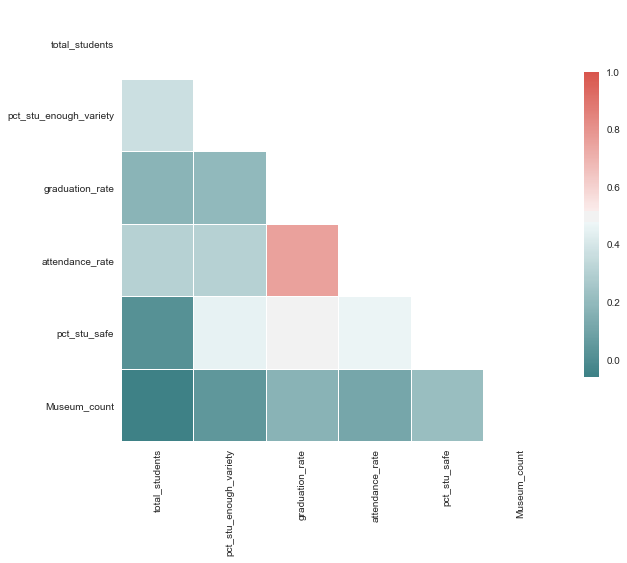

In [23]:
sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 
f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(200, 14, as_cmap=True) 
sns.heatmap(corr, mask=mask, cmap= cmap, center= 0.5, square=True, linewidths= 0.2, cbar_kws={"shrink": 0.7})
plt.show()

From the above correlation analysis, one can notice there exists strong positive correlation, which is 0.756988, between 'attendance_rate' and 'graduation_rate'.

- Boxplot analysis and Whisker Boundary<br>
Look at how "graduation_rate" distributes across different borough in terms of quartiles.

First, we can look at the distribution of our target "graduation_rate". 

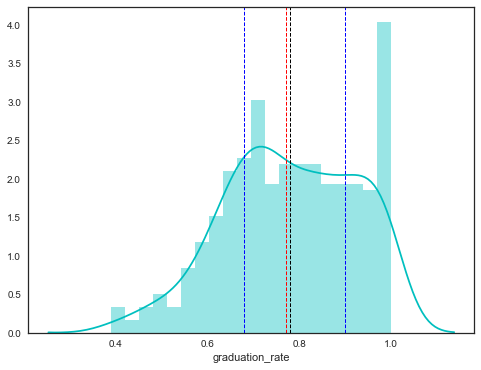

In [24]:
plt.figure(figsize = (8,6))
sns.distplot(df['graduation_rate'], bins= 20, color='c')
plt.axvline(df['graduation_rate'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['graduation_rate'].median(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(df['graduation_rate'].quantile(q = 0.75), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df['graduation_rate'].quantile(q = 0.25), color='b', linestyle='dashed', linewidth=1)
plt.show()

From the distribution plot above, we can know there are 2 peaks around "graduation_rate" of 0.7 and 1.0. Also, the 'graduation_rate' is slightly skewed to the right since the mean is larger than the median. Now, we can break 'graduation_rate' down by 'Borough'.

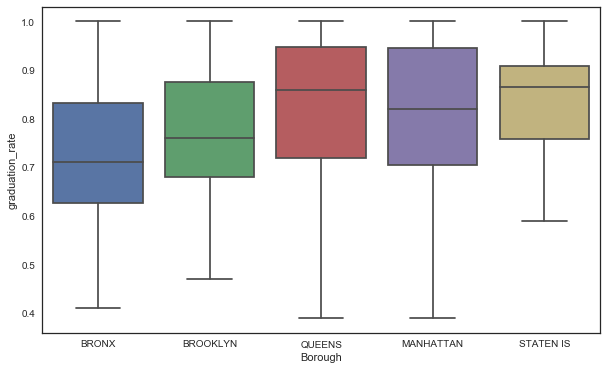

In [25]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'Borough', y = 'graduation_rate', data = df) 
plt.show()

According to the boxplot analysis, one can see that Queens and Manhattan have very wide spread of graduation_rate, meaning the variances within these two boroughs are higher than others. In addition, Queens area has the highest graduation rate in terms of median compared to other areas. Staten Island is more compact with its smaller range of graduation rate.

## Part 6: Feature engineering & selection

Augment your dataset in at least 1 way (e.g., binning, calculations, transformations, etc.)

- Standardization

In [26]:
# Look at the statistic summary of the dataset
df.describe()

,total_students,pct_stu_enough_variety,graduation_rate,attendance_rate,pct_stu_safe,Museum_count
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,741.276923,0.737564,0.779359,0.876436,0.828231,1.043590
std,786.605587,0.142972,0.142442,0.052450,0.091563,1.725552
min,128.000000,0.150000,0.390000,0.730000,0.380000,0.000000
25%,394.000000,0.660000,0.680000,0.840000,0.770000,0.000000
50%,481.000000,0.770000,0.770000,0.880000,0.840000,0.000000
75%,656.250000,0.840000,0.900000,0.920000,0.900000,1.000000
max,5682.000000,1.000000,1.000000,0.990000,1.000000,9.000000


From the above summary, one can notice 'total_students' and 'Museum_count' have relatively larger scale than other features. Therefore, in order to make the model training less sensitive to the scale of our data, I am going to standardize 'total_students' and 'Museum_count'. To get these 2 features range from 0 to 1, I choose to use MinMaxScaler.

In [27]:
from sklearn import preprocessing
cols_to_normalize = ['total_students','Museum_count']
x = df[cols_to_normalize].values
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(x)
df_temp = pd.DataFrame(scaled_df, columns= cols_to_normalize, index = df.index)
df[cols_to_normalize] = df_temp

After conducting the standardization, the scale of the numerical features are similar.

In [28]:
df.describe()

,total_students,pct_stu_enough_variety,graduation_rate,attendance_rate,pct_stu_safe,Museum_count
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,0.110421,0.737564,0.779359,0.876436,0.828231,0.115954
std,0.141629,0.142972,0.142442,0.052450,0.091563,0.191728
min,0.000000,0.150000,0.390000,0.730000,0.380000,0.000000
25%,0.047893,0.660000,0.680000,0.840000,0.770000,0.000000
50%,0.063558,0.770000,0.770000,0.880000,0.840000,0.000000
75%,0.095112,0.840000,0.900000,0.920000,0.900000,0.111111
max,1.000000,1.000000,1.000000,0.990000,1.000000,1.000000


- One-Hot Encoding<br>
In order to train the model, I need to transfrom the categorical features into numerical values. In this case, I choose to use One-Hot Encoding, which will convert each level of categorical feature into dummy values.

In [29]:
# One-Hot Encoding for categorical variables
temp = pd.get_dummies(df[cat_col])

In [30]:
# drop the original categorical variables
df = df.drop(cat_col, axis = 1)
df = df.drop('school_name', axis = 1)
# Combine the converted categorical features with the numerical features
df = df.join(temp)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 434
Columns: 241 entries, total_students to Borough_STATEN IS
dtypes: float64(6), uint8(235)
memory usage: 120.8 KB


After the data preparation, we now have a dataframe with 390 rows and 241 columns. We can proceed to tranform the dataframe into matrix for model training.

In [32]:
X = np.array(df.loc[:, df.columns != 'graduation_rate'])
y = np.array(df['graduation_rate'])

In [33]:
print(X.shape)
print(y.shape)

(390, 240)
(390,)


In [34]:
# Partition the dataset into training data and test data
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2)

/Users/michellehsu/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Part 7: Modeling

I choose to use Linear Regression with Lasso Regularization for the problem since it is a very interpretable yet powerful algorithm.

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

- Simple Linear Regression without Lasso Regularization

In [36]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print("R square of simple Linear Regression = %.3f "%lr_model.score(X_train, y_train))

R square of simple Linear Regression = 0.781 


In [37]:
preds = lr_model.predict(X_test)
print("Mean square error of simple Linear Regression = %.3f " %mean_squared_error(y_test, preds))

Mean square error of simple Linear Regression = 58341659302820654874624.000 


- Linear Regression with Lasso Regularization<br>
I used 10-fold cross validation to tune the regularization hyperparameter.

In [38]:
lr_cv = LassoCV(cv=10).fit(X_train, y_train)
print("The best alpha is = %.3f"%lr_cv.alpha_)
print("R square of Linear Regression with Lasso Regularization = %.3f "%lr_cv.score(X_train, y_train))

The best alpha is = 0.001
R square of Linear Regression with Lasso Regularization = 0.615 


In [39]:
preds_cv = lr_cv.predict(X_test)
print("Mean square error of Linear Regression with Lasso Regularization = %.3f " %mean_squared_error(y_test, preds_cv))

Mean square error of Linear Regression with Lasso Regularization = 0.007 


From the above model result, we know that Linear Regression with Lasso Regularization performs better than simple Linear Regression in terms of Mean square error.

## Part 8: Model Interpretation

Explain the model’s output. Choose evaluation metrics to measure the success of your model & explain why you chose those metrics.

After training the Linear Regression, we can interpret the output by its coefficients. The Linear Regression with Lasso Regularization will zero out redundant and unimportant variables, which makes the model simpler and more generalizable. Originally, we have 241 features. However, by adopting Lasso Regularization, our final model has only 37 features.

In [40]:
# Create a dictionary to store the feature with its corresponding coefficient
feature_coef = dict(zip(list(df.columns[df.columns != 'graduation_rate']), lr_cv.coef_))

In [41]:
# Extract the features with non-zero coefficient
dict((k, v) for k, v in feature_coef.items() if v != 0)

{'Borough_BRONX': -0.0099336061471122852,
 'Borough_BROOKLYN': 0.0066736807882198925,
 'Borough_MANHATTAN': -0.0066682303559908356,
 'Museum_count': 0.025514535844171099,
 'Postcode_10003': 0.0026157607212407173,
 'Postcode_10040': -1.7601079498461477e-05,
 'Postcode_10456': 0.0063391303573040224,
 'Postcode_10459': -0.014701520350597958,
 'Postcode_10463': 0.0063337079645609546,
 'Postcode_10473': -0.00037185389574407988,
 'Postcode_11201': 0.0095112016055100175,
 'Postcode_11207': 0.039747497545839179,
 'Postcode_11214': 0.0062055032804745995,
 'Postcode_11434': -0.025215786260291046,
 'attendance_rate': 1.5270936665192991,
 'neighborhood_Brighton Beach': -0.0032552137670149367,
 'neighborhood_Bushwick': 0.013711958431118448,
 'neighborhood_Castle Hill-Clason Point': -0.0041810687083225643,
 'neighborhood_Clinton': 0.015097523004863611,
 'neighborhood_DUMBO-Downtown Brooklyn': 0.012283574364375919,
 'neighborhood_Gramercy': 0.033899542317088305,
 'neighborhood_Gravesend': 0.018376237

Since our focus here is the relationship between 'graduation_rate' and 'Museum_count', I will first investigate the coefficient of 'Museum_count'. 

In [42]:
print("The coefficient of Museum_count = %.5f"%feature_coef['Museum_count'])

The coefficient of Museum_count = 0.02551


- Interpretation & Hypothesis Result

From the model, we know that 'Museum_count' is somewhat important since its coefficient is not 0. Instead, the coefficient of 'Museum_count'is 0.02952, which means the graduation rate will increase by 0.02952 with an additional museum in the area, holding other factors constant. The same interpretation can be apply to other coefficients. For instance, the graduation rate will improve by 1.57969 with 1 unit increase in attendance rate.<br>

To test whether 'Museum_count' is significantly important in predicting 'graduation_rate', I calculated the Z-score as followed.

In [43]:
# Calculate the Z-score: (coefficient - 0)/standard error
z = 0.02952/(np.std(df['Museum_count'])/len(df)**(1/2.0))
print("The Z-score is %.3f"%z)

The Z-score is 3.045


Based on the Z-score, we know 'Museum_count' is significant since the corresponding p-value is less than 0.0012. Therefore, we can reject the null hypothesis and conclude that the number of museums and graduation rate has positive relationship. 

- Model Evaluation

For model evaluation, I chose to use <b>Mean Squared Error</b> as the metric. This is the most commonly used metric for Linear Regression. The following is the formula for Mean Squared Error:<br>
$MSE = \frac{1}{n}\sum\limits_{i=1}^{n} (y_i - \hat{y}_i)^2$

In [44]:
print("Mean square error of simple Linear Regression = %.3f " %mean_squared_error(y_test, preds))
print("Mean square error of Linear Regression with Lasso Regularization = %.3f " %mean_squared_error(y_test, preds_cv))

Mean square error of simple Linear Regression = 58341659302820654874624.000 
Mean square error of Linear Regression with Lasso Regularization = 0.007 


Comparing the Linear Model with Lasso Regularization and without Lasso Regularization, we can clearly see that the one with regularization performs much better.

## Part 9: Analysis

Write a short summary paragraph that explains how your quantitative analyses and modeling ladder back up your hypothesis.

- Summary<br>
In this project, I want to test whether the number of museums and high school graduation rate have significantly positive relationship. In order to quantify the analysis, I adopted Linear Regression with Lasso Regularization due to its simplicity and generalizability. Before training the model, I standardized 'total_students' and 'Museum_count' to make sure the scale of the features is comparable. Also, I converted the categorical variables into dummy values using One-Hot Encoding. While training the Linear model, I used 10-fold cross validation to tune the hypterparameter for regularization power. The Linear Regression with Lasso Regularization ended up performing much better than the one without regularization. From the model result, the coefficient for the number of museums('Museum_count') is not 0, implying that the feature is somewhat important in predicting the high school graduation rate. To further analyze the hypothesis, I calculated the Z-score based on the coefficient and standard error of the feature, which verify the statistical significance of 'Museum_count'. Hence, we can reject the null hypothesis and conclude that the number of museums has positive relationship with high school graduaion rate under significane level of 0.05.